# Predicting House Prices

# 1. Data Preparation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = pd.read_csv('house-prices.csv')

In [34]:
data

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [35]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [36]:
data.tail()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West
127,128,124600,2250,3,3,4,No,North


In [37]:
data.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

array([[<Axes: title={'center': 'Home'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'SqFt'}>],
       [<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Bathrooms'}>,
        <Axes: title={'center': 'Offers'}>]], dtype=object)

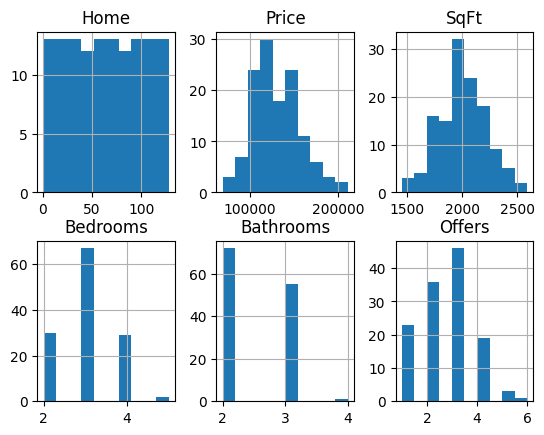

In [47]:
data.hist(layout=(2,3))

In [48]:
data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


Split the data into "TRAINING" & "TESTING" sets

In [15]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/f4/ce/be0b376ba6069f3f8ba240aa532a374733447453c93582d4c474effdde21/scipy-1.11.3-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.1 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 f


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
x = data[['SqFt', 'Bedrooms', 'Bathrooms']]
x.head(2)

,SqFt,Bedrooms,Bathrooms
0,1790,2,2
1,2030,4,2


In [56]:
y = data[['Price']]
y.head(2)

,Price
0,114300
1,114200


In [57]:
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
data.shape

(128, 8)

In [71]:
x_train.shape

(102, 1)

In [63]:
x_test

,SqFt,Bedrooms,Bathrooms
55,1720,2,2
40,1560,2,2
19,1920,3,3
31,1930,2,2
98,2060,3,2
56,2190,3,2
69,2080,4,3
104,1910,3,2
81,2140,4,3
26,2000,4,2


# 2. Implement Simple Linear Regression

In [64]:
x = data[['SqFt']].values
y= data[['Price']].values


In [65]:
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [66]:
x

array([[1790],
       [2030],
       [1740],
       [1980],
       [2130],
       [1780],
       [1830],
       [2160],
       [2110],
       [1730],
       [2030],
       [1870],
       [1910],
       [2150],
       [2590],
       [1780],
       [2190],
       [1990],
       [1700],
       [1920],
       [1790],
       [2000],
       [1690],
       [1820],
       [2210],
       [2290],
       [2000],
       [1700],
       [1600],
       [2040],
       [2250],
       [1930],
       [2250],
       [2280],
       [2000],
       [2080],
       [1880],
       [2420],
       [1720],
       [1740],
       [1560],
       [1840],
       [1990],
       [1920],
       [1940],
       [1810],
       [1990],
       [2050],
       [1980],
       [1700],
       [2100],
       [1860],
       [2150],
       [2100],
       [1650],
       [1720],
       [2190],
       [2240],
       [1840],
       [2090],
       [2200],
       [1610],
       [2220],
       [1910],
       [1860],
       [1450],
       [22

# Simple Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()
print('\n----- Linear regression Training Started -----')
print()
model.fit(x_train, y_train)
print()
print('\n Training Completed')
print()
y_pred = model.predict(x_test)
print('\n----- Predicting Price -----\n\n', y_pred)
print()
print('\n Testing Completed')


----- Linear regression Training Started -----



 Training Completed


----- Predicting Price -----

 [[109451.07078841]
 [ 97605.44963186]
 [124258.0972341 ]
 [124998.44855638]
 [134623.01574608]
 [144247.58293577]
 [136103.71839065]
 [123517.74591181]
 [140545.82632435]
 [130180.90781237]
 [141286.17764664]
 [107970.36814384]
 [119815.98930039]
 [139805.47500207]
 [162756.36599289]
 [130180.90781237]
 [121296.69194496]
 [144247.58293577]
 [135363.36706836]
 [ 94644.04434272]
 [107970.36814384]
 [132401.96177922]
 [126479.15120095]
 [120556.34062267]
 [169419.52789345]
 [116114.23268897]]


 Testing Completed


# Vizualize dataset

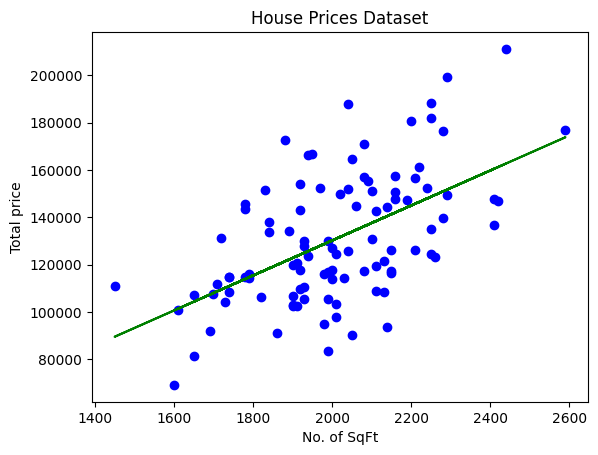

In [80]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='green')
plt.title('House Prices Dataset')
plt.xlabel('No. of SqFt')
plt.ylabel('Total price')
plt.show()

# 3. Evaluate the Simple Linear Regression Model

In [85]:
# Use scikit-learn to Calculate R-Square Value

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

print('\n Mean Squared Error: \t', mean_squared_error(y_test, y_pred))
print()
print('\n RMSE: \t', np.sqrt(mean_squared_error(y_test, y_pred)))
print()
print('\n Variance Score: \t', explained_variance_score(y_test, y_pred))
print()
print('\n R-Squared Value: \t', r2_score(y_test, y))


 Mean Squared Error: 	 415765840.64103884


 RMSE: 	 20390.33694280305


 Variance Score: 	 0.295882133651285


 R-Squared Value: 	 0.2945934454247471


# 4. Implement Multiple Linear Regression

In [86]:
x = data[['SqFt', 'Bedrooms', 'Bathrooms']].values
y= data[['Price']].values


In [89]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x)

print(y_pred)

[[106171.62906591]
 [135645.71671961]
 [114849.42255587]
 [123403.6583256 ]
 [142296.19001622]
 [116275.12851749]
 [131603.39530406]
 [140279.26109488]
 [138497.12864285]
 [128039.13040001]
 [125185.79077762]
 [109023.04098916]
 [120908.67289276]
 [143009.04299703]
 [169151.73451685]
 [126735.05445947]
 [144434.74895865]
 [137306.21915055]
 [102963.79065227]
 [134811.23371771]
 [116631.5550079 ]
 [124116.51130641]
 [113067.29010384]
 [117700.83447911]
 [155607.52788144]
 [158458.93980469]
 [134576.43724839]
 [113423.71659425]
 [ 99399.52574821]
 [149548.27754455]
 [157033.23384307]
 [111161.59993159]
 [146573.30790109]
 [168562.43925626]
 [113656.58536443]
 [140514.05756419]
 [109379.46747956]
 [163092.48417996]
 [114136.56957506]
 [114849.42255587]
 [ 97973.81978659]
 [142419.74773645]
 [113300.15887402]
 [121265.09938317]
 [135524.08669852]
 [117344.40798871]
 [126846.29320856]
 [125898.64375844]
 [112943.73238362]
 [113423.71659425]
 [127680.77621046]
 [108666.61449875]
 [132549.117

# 5. Evaluate the Multiple Linear Regression Model

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)

mae = mean_absolute_error(y, y_pred)
print("\nMean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE) 

mse = mean_squared_error(y, y_pred)
print("\nMean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)

rmse = mean_squared_error(y, y_pred, squared=False)
print("\nRoot Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 16400.07767249686

Mean Squared Error (MSE): 401439264.2517393

Root Mean Squared Error (RMSE): 20035.949297493727


**We Use multiple features in regression analysis to improve prediction accuracy and access multiple relationships between features.

# 9. Final Presentations

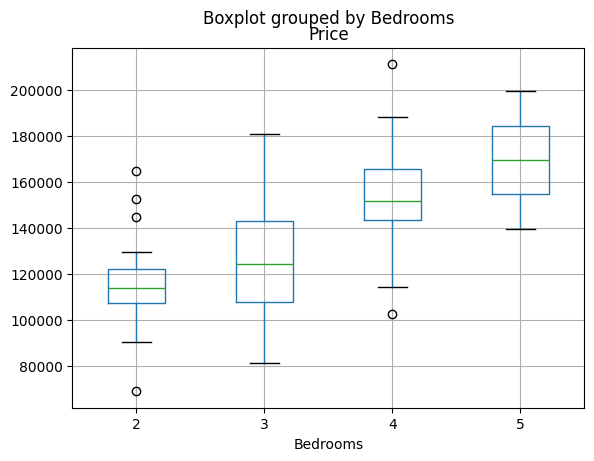

In [94]:
# Assuming 'data' is your DataFrame
data.boxplot(column='Price', by='Bedrooms')
plt.show()
